In [1]:
import pandas as pd

In [2]:
!pwd

/home/jupyter/aiplatform


In [3]:
#obj = open('../data/Anonymized_Fermentation_Data_final.xlsx', 'rb')
obj = open('/home/jupyter/aiplatform/data/Anonymized_Fermentation_Data_final.xlsx', 'rb')
#obj = 'gs://input_data_amy_bkt1/input_data/Anonymized_Fermentation_Data_final.xlsx'
data = pd.read_excel(obj,sheet_name='data') 
meta_data = pd.read_excel(obj,sheet_name='meta data') 

In [4]:
#bkt_excl = 'gs://input_data_amy_bkt1/input_data/Anonymized_Fermentation_Data_final.xlsx'
#data = pd.read_excel(bkt_excl,sheet_name='data') 
#meta_data = pd.read_excel(bkt_excl,sheet_name='meta data') 

## Description
#### This data is derived from measurements during a fermentation process and includes a variety of physiological, biochemical and process parameters. While the full fermentation process might take up to 10 days and we collect real time measurements every few minutes the presented data has been summarized across our commonly used time intervals for assessment of strain performance `Absolute_Interval`. The variables are described in the `meta_data` and are comprised of a variety of fermentation process (`meta data`), physiological and biochemical parameters (`independent`).

### Predictive modeling targets are denoted in `meta_data.query('target == 1)` and include:

* #### `Run_Execution`: was the fermentation process executed as planned (yes/no == alpha/beta)? 
* #### `Run_Performance`: was the strain viable during the fermentation process (yes/no == gamma/delta)?
* #### `Product_Produced__g`: how much product molecule was produced (grams)
* #### `Titer_End__g_over_kg`: how much product was produced relative input feedstock (grams/kilo grams)

In [5]:
data.head()

,Product,Purpose,experiment,run,Project_Name,run_label,Strain,strain_key,Feedstock_Parent1,Start_Time,...,Cap_Oil_Em_End__percent,Cap_PCV_End__percent,Cap_Dead_Cell_Layer_End__percent,Zeex9ieJAlt_end__g_L,Zeex9ieJ_mAU_sec_end__area,Zeex9ieJ_Screening_end__g_L,Zeex9ieJ_end__g_L,Zeex9ieJ_end__g_L.1,Zeex9ieJ_end__g_L.2,interval_type
0,Zeex9ieJ,MF,94CB02FEB7,9,Zeex9ieJ for All,12664-9,94CB02FEB7,9427397,m1098919,2021-04-09 15:52:34,...,0.0,14.53607,NaN,1.673583,0.197670,2.751213,0.000000,0.150839,NaN,Cumulative
1,Zeex9ieJ,MF,94CB02FEB7,9,Zeex9ieJ for All,12664-9,94CB02FEB7,9427397,m1098919,2021-04-09 15:52:34,...,0.0,18.90319,NaN,4.333049,0.285636,3.600460,0.000000,0.294163,NaN,Cumulative
2,Zeex9ieJ,MF,94CB02FEB7,9,Zeex9ieJ for All,12664-9,94CB02FEB7,9427397,m1098919,2021-04-09 15:52:34,...,0.0,19.13803,NaN,5.186557,0.289196,3.596406,0.000000,0.325491,NaN,Cumulative
3,Zeex9ieJ,MF,94CB02FEB7,9,Zeex9ieJ for All,12664-9,94CB02FEB7,9427397,m1098919,2021-04-09 15:52:34,...,0.0,26.28490,NaN,10.083622,0.394463,4.482558,0.054673,0.277906,0.0,Cumulative
4,Zeex9ieJ,MF,94CB02FEB7,9,Zeex9ieJ for All,12664-9,94CB02FEB7,9427397,m1098919,2021-04-09 15:52:34,...,0.0,18.40111,NaN,12.402302,0.500296,5.840546,0.122632,0.301150,0.0,Cumulative


In [6]:
meta_data.head()

,index,name,description,variable type,target
0,0,Product,name of product,metadata,0
1,1,Purpose,"Fermentation purpose MF, IF, SF etc",metadata,0
2,2,experiment,Experiment ID,independent,0
3,3,run,Run ID within experiment,metadata,0
4,4,Project_Name,Project name,metadata,0


In [7]:
print('The data contains {} samples and {} variables'.format(data.shape[0],data.shape[1]))
print('There are {} unique strains which are replicated or measured under different fermentation conditions.'.format(data['Strain'].nunique()))
print('The variables are comprised of a variety of fermentation process, physiological and biochemical parameters:')
display(meta_data['variable type'].value_counts())
print('Predictive modeling targets include: {}'.format(meta_data.query('target == 1').name.values))
display(data[['Run_Execution', 'Run_Performance']].apply(lambda x: x.value_counts()))

The data contains 1568 samples and 124 variables
There are 20 unique strains which are replicated or measured under different fermentation conditions.
The variables are comprised of a variety of fermentation process, physiological and biochemical parameters:


independent    63
metadata       53
dependent       5
category        3
Name: variable type, dtype: int64

Predictive modeling targets include: ['Run_Execution' 'Run_Performance' 'Product_Produced__g'
 'Titer_End__g_over_kg']


,Run_Execution,Run_Performance
alpha,1433.0,NaN
beta,135.0,NaN
delta,NaN,1058.0
gamma,NaN,510.0


In [8]:
#prepare data for analysis
#split out numeric from categorical varibles
var_type_filter = [x in ['independent'] for x in meta_data['variable type']]
var_dtype_filter = (data.dtypes == 'float64') | (data.dtypes == 'int64')

numeric_vars = (var_type_filter & var_dtype_filter).values
data[data.columns[numeric_vars]]

,Viable_Cell_Density__g_over_L,Product_Flux_Viable_Cells__mmol_over_gDCW_over_h,Growth_Rate_Viable_Cells__1_over_h,Death_Rate_Avg__1_over_h,Death_Rate_Avg_Viable_Cells__1_over_h,TRS_Flux_Viable_Cells__mmol_over_gDCW_over_h,TRS_Flux__mmol_over_gDCW_over_h,TRS_for_Other_Viable_Cells__mmol_over_gDCW_over_h,sOUR_Viable_Cells__mmol_over_gDCW_over_h,TRS_to_Maintenance_Flux__mmol_over_gDCW_over_h,...,Cap_Cane_PCV_End__percent,Cap_Feedstock_Solids_End__percent,Cap_Heavy_Em_End__percent,Cap_Light_Em_End__percent,Cap_Oil_Em_End__percent,Cap_PCV_End__percent,Cap_Dead_Cell_Layer_End__percent,Zeex9ieJAlt_end__g_L,Zeex9ieJ_mAU_sec_end__area,Zeex9ieJ_Screening_end__g_L
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153653,...,0.57894,NaN,0.86059,0.00000,0.00000,14.53607,NaN,1.673583,0.197670,2.751213
1,NaN,NaN,NaN,NaN,NaN,NaN,0.451709,NaN,NaN,0.210791,...,0.59743,NaN,1.28676,0.00000,0.00000,18.90319,NaN,4.333049,0.285636,3.600460
2,NaN,NaN,NaN,NaN,NaN,NaN,0.307022,NaN,NaN,0.236642,...,0.34659,NaN,0.24111,0.96444,0.00000,19.13803,NaN,5.186557,0.289196,3.596406
3,NaN,NaN,NaN,NaN,NaN,NaN,0.420256,NaN,NaN,0.274503,...,0.88832,NaN,2.36358,0.00000,0.00000,26.28490,NaN,10.083622,0.394463,4.482558
4,NaN,NaN,NaN,NaN,NaN,NaN,0.405015,NaN,NaN,0.393885,...,2.50503,NaN,1.06696,1.76280,0.00000,18.40111,NaN,12.402302,0.500296,5.840546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,17.614806,0.049335,0.013222,0.003184,0.005342,1.403776,0.836621,1.119942,4.461783,0.667462,...,1.89140,NaN,0.48810,0.51861,36.15009,11.83649,NaN,10.791450,888.284510,14.138946
1564,14.819922,0.050276,0.009846,0.002457,0.004706,1.358599,0.709208,1.125262,4.787741,0.587403,...,2.37672,NaN,1.37429,0.00000,38.18917,10.31528,NaN,13.428900,953.769643,15.153186
1565,11.736481,0.059602,-0.005247,-0.001233,-0.003267,2.087119,0.787523,1.831997,6.264150,0.691259,...,1.72128,NaN,0.92685,0.00000,35.58424,12.04899,NaN,7.592766,782.797093,11.905930
1566,10.364485,0.064013,0.011423,0.002684,0.007113,1.921419,0.725000,1.470872,5.829607,0.554997,...,1.89140,NaN,0.48810,0.51861,36.15009,11.83649,NaN,10.791450,888.284510,14.138946


In [9]:
#meta_data.query('name in {}'.format(data.columns[numeric_vars]))
meta_data.query('name in {}'.format(list(data.columns[numeric_vars].values)))

,index,name,description,variable type,target
13,13,Viable_Cell_Density__g_over_L,Density of viable cells,independent,0
14,14,Product_Flux_Viable_Cells__mmol_over_gDCW_over_h,Cell-specific product flux,independent,0
15,15,Growth_Rate_Viable_Cells__1_over_h,Viable cell-specific growth rate,independent,0
16,16,Death_Rate_Avg__1_over_h,Cell-specific death rate,independent,0
17,17,Death_Rate_Avg_Viable_Cells__1_over_h,Viable cell-specific death rate,independent,0
...,...,...,...,...,...
115,115,Cap_PCV_End__percent,Packed cell volume capillary cell layer,independent,0
116,116,Cap_Dead_Cell_Layer_End__percent,Packed cell volume capillary dead cell layer,independent,0
117,117,Zeex9ieJAlt_end__g_L,Alternative assay product titer,independent,0
118,118,Zeex9ieJ_mAU_sec_end__area,Product titer peak area,independent,0


### Preprocess

In [10]:
#Prepare data for analysis
#Split out numeric from categorical varibles

##var_type_filter = [x in ['physiological','biochemical','process'] for x in meta_data['variable type']]
var_type_filter = [x in ['independent'] for x in meta_data['variable type']]
var_dtype_filter = (data.dtypes == 'float64') | (data.dtypes == 'int64')

numeric_vars = (var_type_filter & var_dtype_filter).values
numeric_x_data = data[data.columns[numeric_vars]]

#things to try to predict
y_data = data[data.columns[(meta_data['target'] == 1).values]]

#meta data about variables
meta_data = meta_data.query('name in {}'.format(list(data.columns[numeric_vars].values))).set_index('name')

In [11]:
#Variables which will be used to build the model
data.columns[numeric_vars].values

array(['Viable_Cell_Density__g_over_L',
       'Product_Flux_Viable_Cells__mmol_over_gDCW_over_h',
       'Growth_Rate_Viable_Cells__1_over_h', 'Death_Rate_Avg__1_over_h',
       'Death_Rate_Avg_Viable_Cells__1_over_h',
       'TRS_Flux_Viable_Cells__mmol_over_gDCW_over_h',
       'TRS_Flux__mmol_over_gDCW_over_h',
       'TRS_for_Other_Viable_Cells__mmol_over_gDCW_over_h',
       'sOUR_Viable_Cells__mmol_over_gDCW_over_h',
       'TRS_to_Maintenance_Flux__mmol_over_gDCW_over_h',
       'Est_Liquid_Solid_Yield__percent',
       'Est_Liquid_Liquid_Yield__percent', 'Est_Recovery__percent',
       'interval_day', 'interval_end_day', 'is_curated_interval',
       'Unadjusted_TRS_consumption_rate__g_over_gDCW_over_h',
       'TRS_for_Product__gTRS', 'TRS_for_Biomass__gTRS',
       'TRS_for_Glycerol__gTRS', 'TRS_for_Other__gTRS', 'TRS__g',
       'Interval_biomass__gDCW_over_L', 'TRS_consumed__g',
       'TRS_to_maint__g', 'Growth_Rate__hr_1',
       'Flux__g_product_over_gDCW_over_hr',
    

## Create train, validate and test datasets

In [12]:
from sklearn.model_selection import train_test_split

model_target = 'Run_Performance' 

#maintain class balance
X_train, X_test, y_train, y_test = train_test_split(numeric_x_data, y_data, test_size=0.25, stratify = y_data[model_target], random_state=42)

#split train set to create a pseudo test or validation dataset
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.33, stratify= y_train[model_target], random_state=42)

In [13]:
print('The training, validation and test data contain {}, {} and {} rows respectively'.format(len(X_train),len(X_validate),len(X_test)))

The training, validation and test data contain 787, 389 and 392 rows respectively


## Impute and scale

In [14]:
#simple sklearn impute and scale numeric pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

#impute missing with median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

#auto scale
scaler = StandardScaler()

pipe = Pipeline([('imputer',imputer),('scaler', scaler)])


X_train_scaled = pipe.fit_transform(X_train)

### Multivariate overview of the `training` data

In [254]:
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_train_scaled)

#collect results
def get_results(res,prefix='',ncol=3, add=None):
    
    out= pd.DataFrame()
    for i in range(ncol):
        key = prefix + str(i+1)
        value = res[:,i]
        out.loc[:,key] = value
    
    if add is not None:
        out = pd.concat([out,add],axis=1)
    
    return out

df = get_results(pca_result,'pca-', add = y_train.reset_index())


print('Explained % variation per principal component: {}'.format( (pca.explained_variance_ratio_ *100).round(2)))

df.head()

Explained % variation per principal component: [14.4  12.3  11.38]


,pca-1,pca-2,pca-3,index,Run_Execution,Run_Performance,Product_Produced__g,Titer_End__g_over_kg
0,-0.508393,2.329968,-1.290989,957,alpha,delta,1.66189,6.49592
1,-3.528194,-0.780347,3.860243,1203,alpha,delta,20.04515,22.99240
2,1.483099,0.498130,-0.809640,1218,alpha,delta,2.20230,6.71537
3,0.583943,-1.142496,-1.008615,574,alpha,gamma,5.00418,7.98041
4,-2.345499,-4.671027,2.626721,232,alpha,delta,26.73423,13.84721


## sample scores

In [255]:
#view sample scores
import plotly.graph_objects as go

#data for hover
tmp = df
customdata = np.stack(([tmp[x] for x in tmp]), axis = -1)
#hover text as  html
res = []
for i,name in enumerate(tmp.columns):
    res.append('<b>{}</b>: %{{customdata[{}]}}<br>'.format(name,i))
    
hovertemplate = ''.join(res)

#select variables to show
prefix = 'pca'
vars = []
for cols in df.columns:
    
    if cols.find(prefix) !=-1:
        vars.append(dict(label=cols,values=df[cols]))

In [256]:
#define custom colors
import plotly.express as px

color_var = model_target

colors =  px.colors.qualitative.Plotly[0:df[color_var].nunique()] # change palette if not discreet

opt_color = []
_color_var = pd.factorize(tmp[color_var])

for i in _color_var[0]:
    opt_color.append(colors[i])    


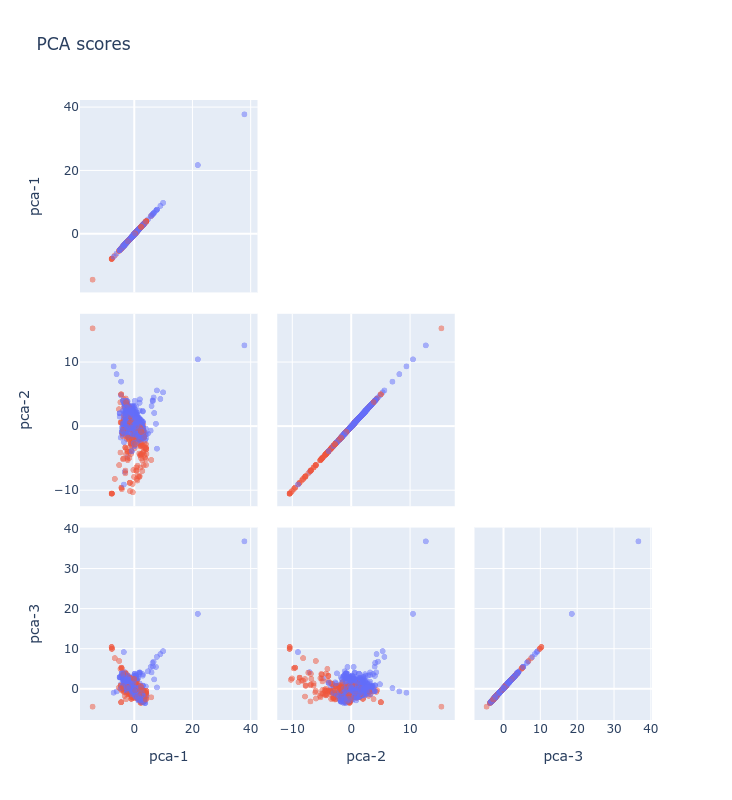

In [257]:
fig = go.Figure(data=go.Splom(dimensions=vars,
                              marker=dict(color=opt_color,opacity=.5),
                              showupperhalf=False,
                              hovertemplate = hovertemplate,
                              customdata  = customdata
                             )
               )


fig.update_layout(
    title='PCA scores',
    width=800,
    height=800,
)

fig.show()

## variable loadings

In [17]:
pca_loadings = pd.DataFrame()
df =  pca_loadings
loadings=pca.components_.T * np.sqrt(pca.explained_variance_)

extra = (pd.DataFrame({'name': X_train.columns.tolist()})
         .set_index('name')
         .join(meta_data)
         .reset_index()
        )
        



pca_loadings = get_results(loadings,'pca-',add = extra)
pca_loadings.head()

NameError: name 'pca' is not defined

In [262]:
#select variables to show
df = pca_loadings

vars = []
for cols in df.columns:
    
    if cols.find('pca') !=-1:
        vars.append(dict(label=cols,values=df[cols]))
        


fig = go.Figure(data=go.Splom(dimensions=vars,
                              showupperhalf=False,
                              hovertemplate = 'variable:%{text}',
                              text=df['name'],
                             )
               )


fig.update_layout(
    title='PCA loadings',
    width=800,
    height=800,
)

fig.show()

KeyError: 'name'

In [263]:
#get top +/- loading variables
pc = 'pca-2'
n = 3
tmp = pca_loadings.sort_values(pc)
top_vars = tmp.head(n).name.tolist() + tmp.tail(n).name.tolist()

KeyError: 'pca-2'

In [264]:
### plot top loadings variables raw data
import plotly.express as px
import math

df = pca_loadings

_df = pd.concat([y_train,X_train],axis=1)

_df = _df.melt(id_vars=[model_target])

_df = _df.query('variable in {}'.format(top_vars))

SyntaxError: Python keyword not valid identifier in numexpr query (<unknown>, line 1)

In [265]:
# _df['value'].describe()
# [print(x) for x in _df['value']]

df = pca_loadings

_df = pd.concat([y_train[model_target],X_train],axis=1)

_df = _df.melt(id_vars=[model_target])
_df

,Run_Performance,variable,value
0,delta,Viable_Cell_Density__g_over_L,NaN
1,delta,Viable_Cell_Density__g_over_L,NaN
2,delta,Viable_Cell_Density__g_over_L,NaN
3,gamma,Viable_Cell_Density__g_over_L,NaN
4,delta,Viable_Cell_Density__g_over_L,NaN
...,...,...,...
48002,gamma,Zeex9ieJ_Screening_end__g_L,9.239340
48003,delta,Zeex9ieJ_Screening_end__g_L,20.277380
48004,delta,Zeex9ieJ_Screening_end__g_L,20.277380
48005,delta,Zeex9ieJ_Screening_end__g_L,16.214683


In [266]:
### plot top loadings variables raw data
import plotly.express as px
import math

df = pca_loadings

_df = pd.concat([y_train[model_target],X_train],axis=1)

_df = _df.melt(id_vars=[model_target])

_df['value'] = _df['value'].clip(lower=0)
                   
_df = _df.query('variable in {}'.format(top_vars)).dropna()

_df['shifted_log_value'] = [math.log(x+1) for x in _df['value']]


fig = px.violin(_df, y="shifted_log_value", x="variable", 
                color=color_var, box=True, points="all",
                hover_data=_df.columns,
                color_discrete_map={'delta': colors[0] ,'gamma':colors[1]})

# fig.update_layout( yaxis_type="log")
fig.show()

SyntaxError: Python keyword not valid identifier in numexpr query (<unknown>, line 1)

## Train, optimize and validate predictive model
### Train


In [15]:
#prepare data for modeling
#use the pipeline created above
_X_train = pipe.fit_transform(X_train)
_y_train = y_train[model_target]    ## selected target label for prediction
_X_test = pipe.fit_transform(X_validate)
_y_test = y_validate[model_target]

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import RandomizedSearchCV


# Simple hyperparameter tunnig for random forest model
estimator = RandomForestClassifier(random_state = 42)

# tune grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [1, 2, 5, 10],
    'bootstrap': [True, False],
    'class_weight' : ["balanced", "balanced_subsample"] # RF classifier tends to be biased towards the majority class, place a heavier penalty on misclassifying the minority class
}

print('class weights (1,0): {}'.format(compute_class_weight('balanced', np.unique(_y_train), _y_train)) )



# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=42)

# Fit 
rs.fit(_X_train, _y_train)

class weights (1,0): [0.74105461 1.53710938]
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=['delta' 'gamma'], y=957     delta
1203    delta
1218    delta
574     gamma
232     delta
        ...  
492     gamma
1491    delta
1501    delta
1180    delta
1336    delta
Name: Run_Performance, Length: 787, dtype: object as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.0s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.89999999999999...
                                                 

In [86]:
#select best model
best_model = rs.best_estimator_

train_rf_predictions = best_model.predict(_X_train)
train_rf_probs = best_model.predict_proba(_X_train)[:, 1]

rf_predictions = best_model.predict(_X_test)
rf_probs = best_model.predict_proba(_X_test)[:, 1]

Accuracy of classifier on validation set: 0.85
              precision    recall  f1-score   support

       delta       0.97      0.80      0.88       262
       gamma       0.70      0.94      0.80       127

    accuracy                           0.85       389
   macro avg       0.83      0.87      0.84       389
weighted avg       0.88      0.85      0.85       389



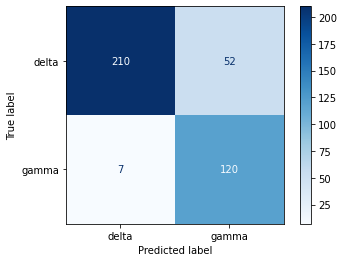

In [87]:
#evaluate performance on validation data
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('Accuracy of classifier on validation set: {:.2f}'.format(best_model.score(_X_test, _y_test).round(2)))
print(classification_report(_y_test, rf_predictions))
plot_confusion_matrix(best_model, _X_test, _y_test,
#                                  display_labels=['no','yes'],
                                 cmap=plt.cm.Blues)

In [88]:
#lets rank the predictors
from sklearn.inspection import permutation_importance
result = permutation_importance(best_model, _X_test, _y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

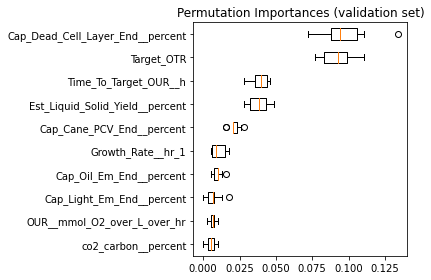

In [89]:
#show top variables
top_vars = sorted_idx[-10:]

fig, ax = plt.subplots()
ax.boxplot(result.importances[top_vars].T,
           vert=False, labels = meta_data.iloc[top_vars,].index.values)
ax.set_title("Permutation Importances (validation set)")
fig.tight_layout()
plt.show()

In [90]:
#could simplify model by selecting top x variables and re-optimizing

Accuracy of classifier on test set: 0.85
              precision    recall  f1-score   support

       delta       0.97      0.80      0.88       262
       gamma       0.70      0.94      0.80       127

    accuracy                           0.85       389
   macro avg       0.83      0.87      0.84       389
weighted avg       0.88      0.85      0.85       389



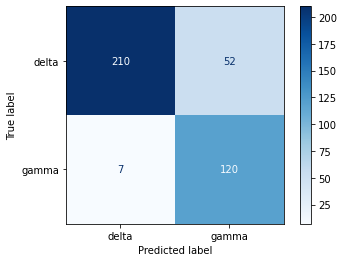

In [91]:
#evaluate performance on test data
_X_test2 = pipe.fit_transform(X_test)
_y_test2 = y_test[model_target]

rf_predictions = best_model.predict(_X_test)
rf_probs = best_model.predict_proba(_X_test)[:, 1]

print('Accuracy of classifier on test set: {:.2f}'.format(best_model.score(_X_test, _y_test).round(2)))
print(classification_report(_y_test, rf_predictions))
plot_confusion_matrix(best_model, _X_test, _y_test,
#                                  display_labels=['no','yes'],
                                 cmap=plt.cm.Blues)

In [92]:
# #lets try tpot for fun
#can take a while
# from tpot import TPOTClassifier


# tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
# tpot.fit(_X_train, _y_train)
# print(tpot.score(_X_test, _y_test))
# # tpot.export('tpot_example.py')

In [93]:
# best_model = tpot

# #evaluate performance on test data
# _X_test = pipe.fit_transform(X_test)
# _y_test = y_test[model_target]

# rf_predictions = best_model.predict(_X_test)
# rf_probs = best_model.predict_proba(_X_test)[:, 1]

# print('Accuracy of classifier on test set: {:.2f}'.format(best_model.score(_X_test, _y_test).round(2)))
# print(classification_report(_y_test, rf_predictions))
# plot_confusion_matrix(best_model, _X_test, _y_test,
# #                                  display_labels=['no','yes'],
#                                  cmap=plt.cm.Blues)

In [18]:
### Export datasets

X_train = pipe.fit_transform(X_train)
y_train = y_train[model_target]
X_validate = pipe.fit_transform(X_validate)
y_validate = y_validate[model_target]
X_test = pipe.fit_transform(X_test)
y_test = y_test[model_target]

In [21]:
save_list = ['X_train','y_train','X_validate','y_validate','X_test','y_test','meta_data']

for x in save_list:
    obj = pd.DataFrame(globals()[x])
    #cmd = "obj.to_csv('../data/{}.csv')".format(x)
    #cmd = "obj.to_csv('/home/jupyter/aiplatform/data/{}.csv')".format(x)
    cmd = "obj.to_excel('/home/jupyter/aiplatform/data/{}.xlsx')".format(x)
    eval(cmd)

In [97]:
print(best_model)

RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       max_depth=16, max_features=0.7, max_leaf_nodes=45,
                       min_samples_split=5, n_estimators=72, random_state=42)


In [ ]:
save_list_train = ['X_train','y_train','meta_data']
save_list_validate = ['X_validate','y_validate','meta_data']
save_list_test = ['X_test','y_test','meta_data']

for x in save_list_train:
    print("training_dataset", training_dataset)
    obj = pd.DataFrame(globals()[x])
    #cmd = "obj.to_csv('../data/{}.csv')".format(x)
    #cmd = "obj.to_csv('/home/jupyter/aiplatform/data/{}.csv')".format(x)
    cmd = "obj.to_excel('{}/{}.xlsx')".format(training_dataset, x)
    eval(cmd)

for x in save_list_validate:
    print("validation_dataset", validation_dataset)
    obj = pd.DataFrame(globals()[x])
    #cmd = "obj.to_csv('../data/{}.csv')".format(x)
    #cmd = "obj.to_csv('/home/jupyter/aiplatform/data/{}.csv')".format(x)
    cmd = "obj.to_excel('{}/{}.xlsx')".format(validation_dataset, x)
    eval(cmd)    

for x in save_list_test:
    print("testing_dataset", testing_dataset)
    obj = pd.DataFrame(globals()[x])
    #cmd = "obj.to_csv('../data/{}.csv')".format(x)
    #cmd = "obj.to_csv('/home/jupyter/aiplatform/data/{}.csv')".format(x)
    cmd = "obj.to_excel('{}/{}.xlsx')".format(testing_dataset, x)
    eval(cmd)    
